# Distributions

In [1]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab

In [12]:
df = sns.load_dataset("iris")

In [13]:
df.head(3)

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa

In [14]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(df[feature],kde=True)
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist="norm",plot=pylab)
    plt.show()

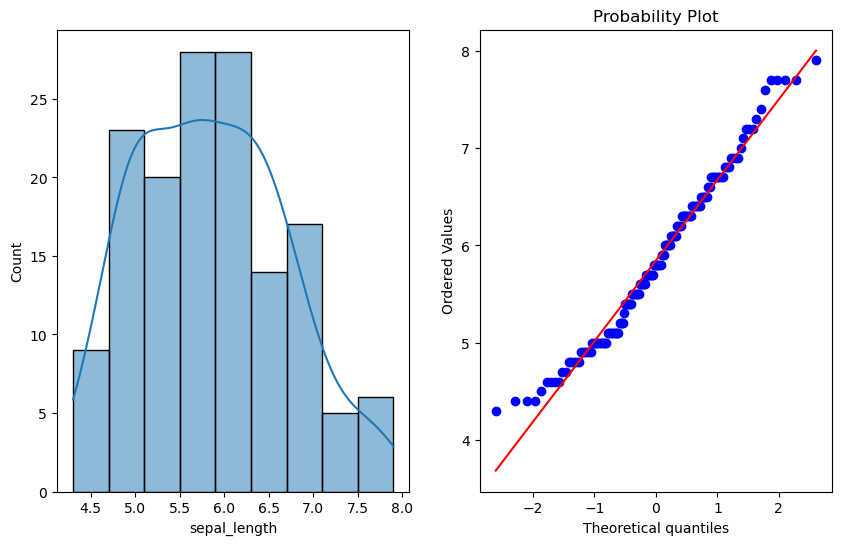

In [15]:
feature = "sepal_length"
plot_data(df,feature)

     binomial_dist  bernoulli_dist  poisson_dist
0                5               0             4
1                6               0             2
2                5               0             2
3                5               1             1
4                5               0             0
..             ...             ...           ...
995              3               1             6
996              5               1             2
997              7               0             2
998              4               0             5
999              6               0             5

[1000 rows x 3 columns]


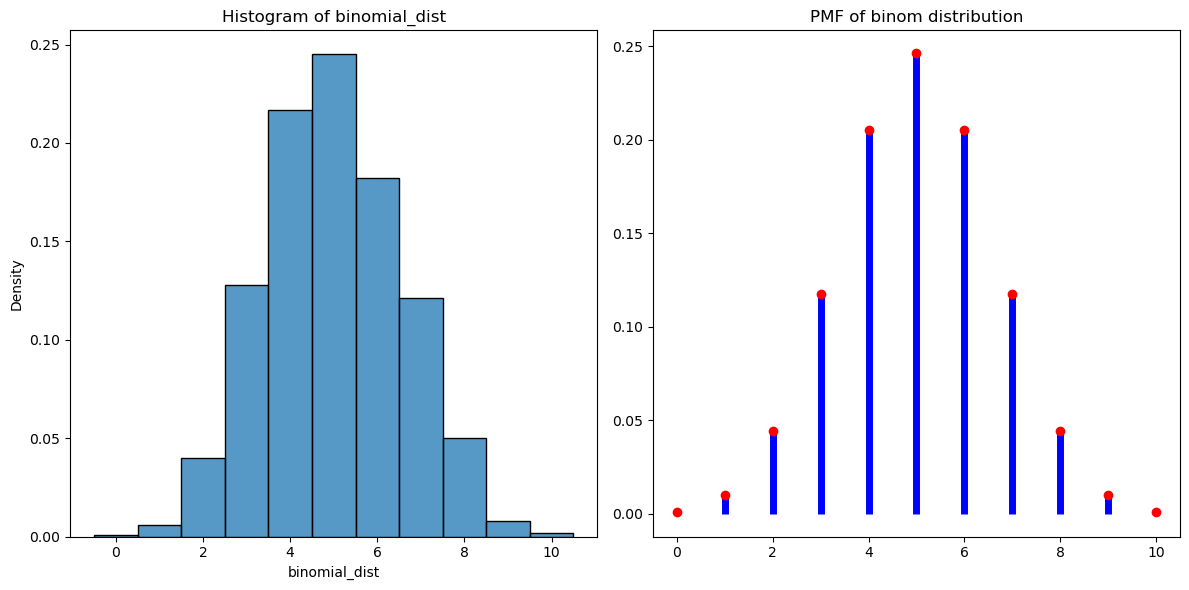

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import pandas as pd

def plot_discrete_data_distribution(df, feature, dist_name, **kwargs):
    plt.figure(figsize=(12,6))
    
    # Plot histogram
    plt.subplot(1,2,1)
    sns.histplot(df[feature], discrete=True, kde=False, stat='density')
    plt.title(f'Histogram of {feature}')
    
    # Plot probability plot
    plt.subplot(1,2,2)
    if dist_name == 'binom':
        n = kwargs.get('n')
        p = kwargs.get('p')
        binom_dist = stats.binom(n, p)
        x = np.arange(0, n + 1)
        y = binom_dist.pmf(x)
    elif dist_name == 'bernoulli':
        p = kwargs.get('p')
        bernoulli_dist = stats.bernoulli(p)
        x = [0, 1]
        y = bernoulli_dist.pmf(x)
    elif dist_name == 'poisson':
        mu = kwargs.get('mu')
        poisson_dist = stats.poisson(mu)
        x = np.arange(0, np.max(df[feature]) + 1)
        y = poisson_dist.pmf(x)
    else:
        raise ValueError("Unsupported distribution")

    plt.vlines(x, 0, y, colors='b', lw=5)
    plt.scatter(x, y, color='r', zorder=5)
    plt.title(f'PMF of {dist_name} distribution')
    
    plt.tight_layout()
    plt.show()

# Example usage:
# For binomial distribution
# plot_discrete_data_distribution(df, 'binomial_feature', dist_name='binom', n=10, p=0.5)

# For Bernoulli distribution
# plot_discrete_data_distribution(df, 'bernoulli_feature', dist_name='bernoulli', p=0.3)

# For Poisson distribution
# plot_discrete_data_distribution(df, 'poisson_feature', dist_name='poisson', mu=3)

# Creating a sample DataFrame
np.random.seed(0)
data = {
    'binomial_dist': np.random.binomial(n=10, p=0.5, size=1000),
    'bernoulli_dist': np.random.binomial(n=1, p=0.3, size=1000),
    'poisson_dist': np.random.poisson(lam=3, size=1000)
}
df = pd.DataFrame(data)
print(df)
# Plot for binomial distribution
plot_discrete_data_distribution(df, 'binomial_dist', dist_name='binom', n=10, p=0.5)

# Plot for Bernoulli distribution
plot_discrete_data_distribution(df, 'bernoulli_dist', dist_name='bernoulli', p=0.3)

# Plot for Poisson distribution
plot_discrete_data_distribution(df, 'poisson_dist', dist_name='poisson', mu=3)


# Continous Distributions

In [17]:
df = sns.load_dataset("iris")
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(df[feature],kde=True)
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=pylab) # dist can be norm,expon ,lognorm
    plt.show()

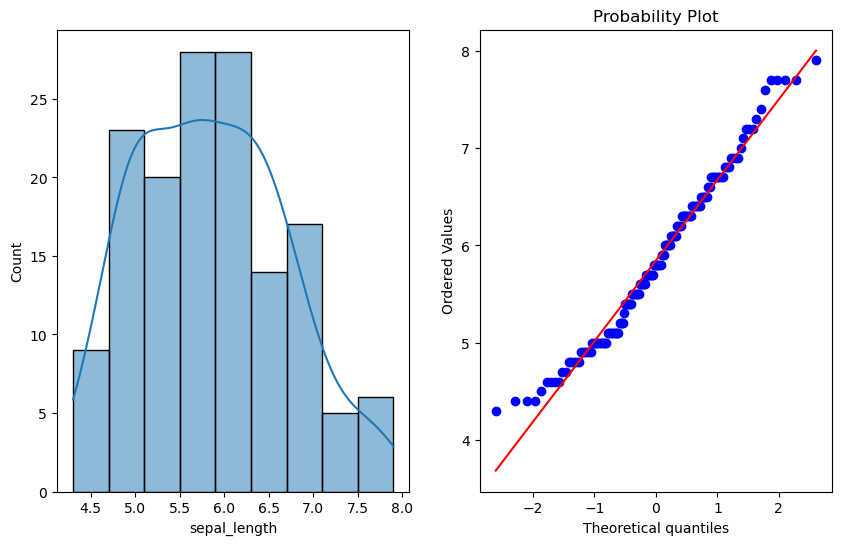

In [18]:
plot_data(df,"sepal_length")

In [19]:
df = sns.load_dataset("iris")
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(df[feature],kde=True)
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='expon',plot=pylab) # dist can be norm,expon
    plt.show()

In [20]:
plot_data(df,"sepal_length")

In [21]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# Discrete Random Variables

## Binomial Distribution

In [18]:
# The Binomial distribution is used when you have a fixed number of independent trials (or experiments), 
# each with the same probability of success, and you want to calculate the probability of getting a specific number of successes across those trials.

n = 10 # no of trials
p = 0.2 # probability of success
# binomial Distribution
binom_dist = stats.binom(n,p)
k_value = np.arange(0,n+1)

#pmf for binomial distribution
pmf_binom = binom_dist.pmf(k_value)

# mean for binomial distribution
mean_binom = binom_dist.mean()

#variance for binomial distribution
var_binom = binom_dist.var()

# Standar deviation for Binomial Distribution
std_binom = binom_dist.std()

#Results
print("the Binomial Distribution are: ",binom_dist,"\n")
print("The pmf values are \n")
for k, pmf in zip(k_value,pmf_binom):
    print(f"P(X={k}) = {pmf:.5f}")

print("Mean for binomial Distribution: ",mean_binom)
print("Variance for binomial distribution: ",var_binom)
print(f"Standard deviation for binomial distribution:{std_binom:.2f}")
plt.vlines(k_value, 0, pmf_binom, colors='b', lw=5)
plt.scatter(k_value,pmf_binom, color='r', zorder=5)
plt.title(f'PMF of binomial distribution')
plt.tight_layout()
plt.show()


the Binomial Distribution are:  <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BE6C68A090> 

The pmf values are 

P(X=0) = 0.10737
P(X=1) = 0.26844
P(X=2) = 0.30199
P(X=3) = 0.20133
P(X=4) = 0.08808
P(X=5) = 0.02642
P(X=6) = 0.00551
P(X=7) = 0.00079
P(X=8) = 0.00007
P(X=9) = 0.00000
P(X=10) = 0.00000
Mean for binomial Distribution:  2.0
Variance for binomial distribution:  1.6
Standard deviation for binomial distribution:1.26


## Bernoulli Distribution

In [17]:
#used when we have only two output and only one trial
p=0.7
k_value=[0,1]

# calculating the bernoulli distribution
bernoulli_dist = stats.bernoulli(p)

#calculating the pmf for bernoulli
pmf_bernoulli = bernoulli_dist.pmf(k_value)

#calculating mean , variance and standar deviation
mean_bernoulli = bernoulli_dist.mean()
var_bernoulli = bernoulli_dist.var()
std_bernoulli = bernoulli_dist.std()

for k , pmf  in zip(k_value,pmf_bernoulli):
    print(f"P(X={k}) = {pmf:.4f}")

print(f"Mean for bernoulli distribution: {mean_bernoulli:.2f}")
print(f"Variance for bernoulli distribution: {var_bernoulli:.2f}")
print(f"Standar Deviation for bernoulli distribution: {std_bernoulli:.2f}")
plt.vlines(k_value, 0, pmf_bernoulli, colors='b', lw=5)
plt.scatter(k_value, pmf_bernoulli, color='r', zorder=5)
plt.title(f'PMF of bernoulli distribution')
plt.tight_layout()
plt.show()


P(X=0) = 0.3000
P(X=1) = 0.7000
Mean for bernoulli distribution: 0.70
Variance for bernoulli distribution: 0.21
Standar Deviation for bernoulli distribution: 0.46


## Poisson Distribution

P(X=0) = 0.0067
P(X=1) = 0.0337
P(X=2) = 0.0842
P(X=3) = 0.1404
P(X=4) = 0.1755
P(X=5) = 0.1755
P(X=6) = 0.1462
P(X=7) = 0.1044
P(X=8) = 0.0653
P(X=9) = 0.0363
P(X=10) = 0.0181


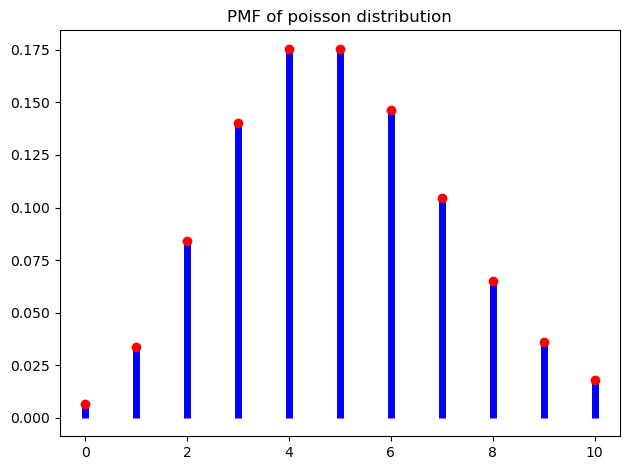

In [30]:
# Count of Events: Use the Poisson distribution to model the number of events occurring in a fixed interval of time or space when events happen independently 
# and at a constant average rate (λ, the mean number of events).Rare Events: It is suitable when events are rare but can occur any number of times within 
# a specified interval.

# mean or variance
lambda_para = 5 

# Poisson Distribution
poisson_dist = stats.poisson(lambda_para)

#X_values
x_values = np.arange(0,11)

#pmf for poisson
pmf_poisson = poisson_dist.pmf(x_values)

for x , pmf  in zip(x_values,pmf_poisson):
    print(f"P(X={x}) = {pmf:.4f}")
plt.vlines(x_values, 0, pmf_poisson, colors='b', lw=5)
plt.scatter(x_values,pmf_poisson, color='r', zorder=5)
plt.title(f'PMF of poisson distribution')
plt.tight_layout()
plt.show()

# Continous Random Variables

## Normal Distribution

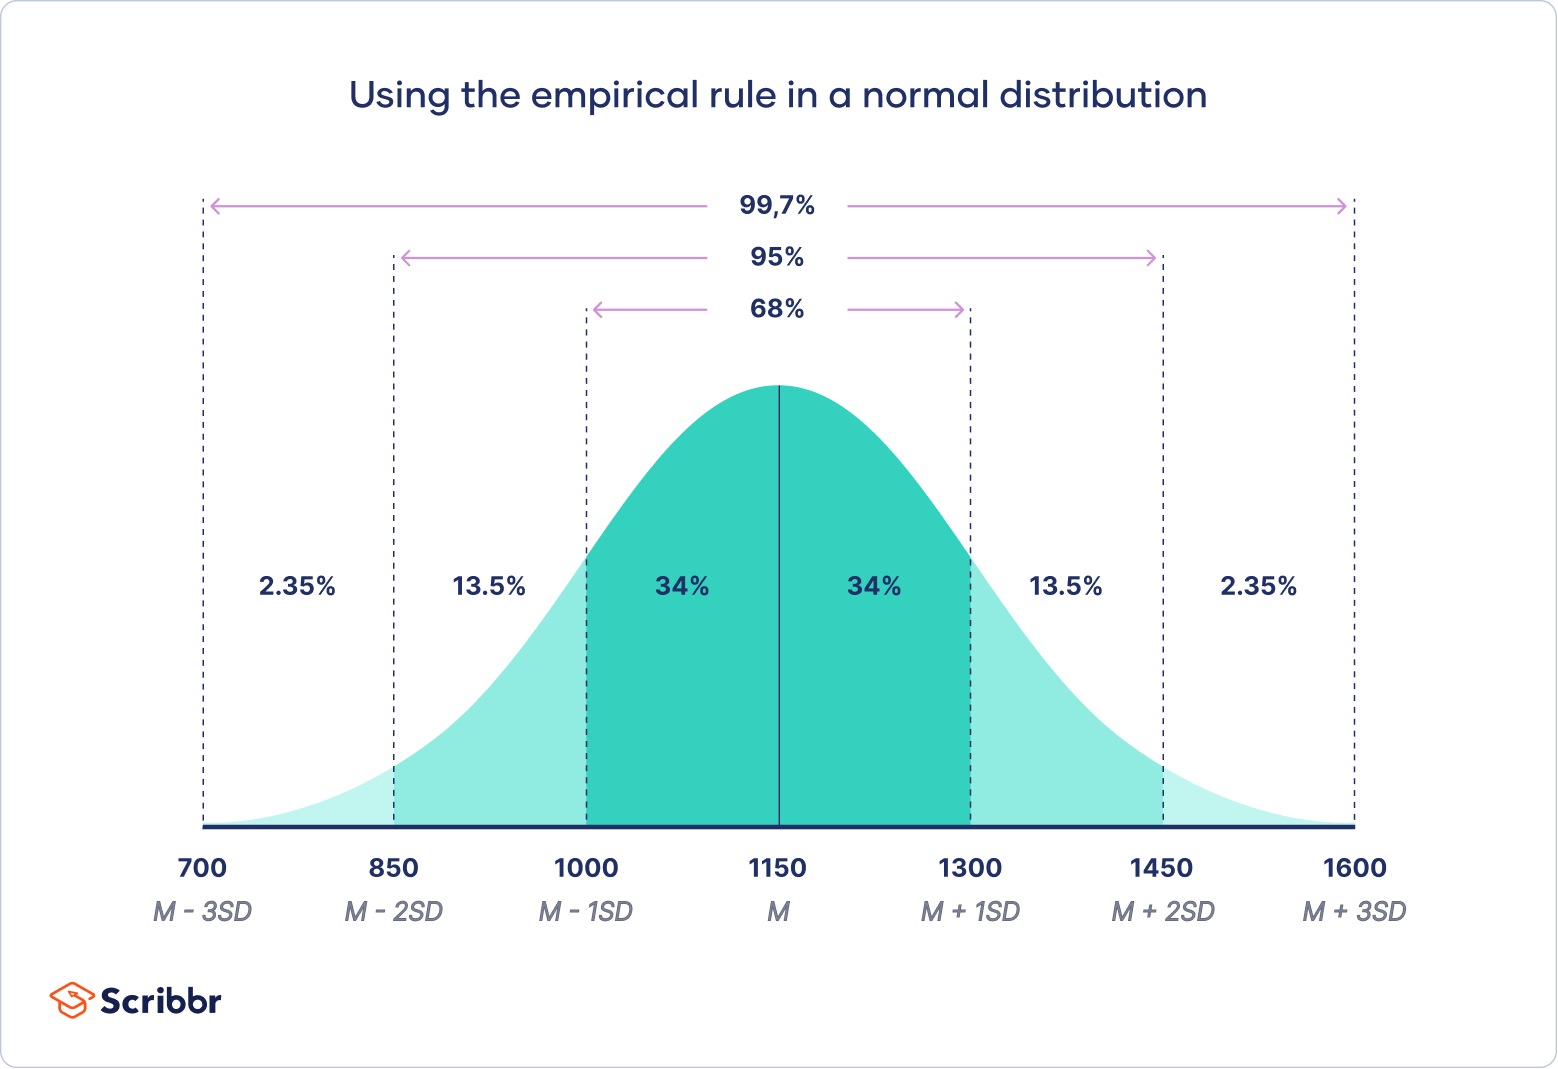

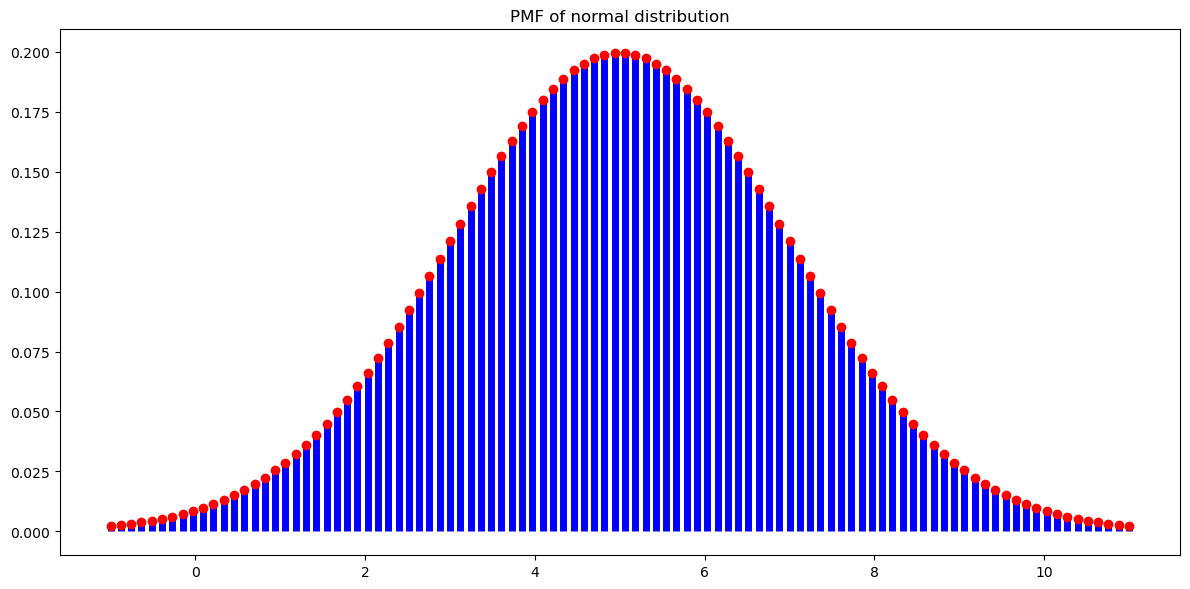

In [31]:
# Normal Distribution: Use when your data is continuous, symmetrically distributed around a central value (mean), 
# and the spread of data can be described by a standard deviation. For example, heights or weights of people in a population, test scores, errors in measurements, etc.

# mean value
mu = 5.0
# standard deviation
sigma = 2.0

# normal distribution
norm_dist = stats.norm(mu,sigma)

#x_values for 99.7% spread
x_values = np.linspace(mu-3*sigma ,mu+3*sigma,100)

# calculating for pdf of normal distribution
pdf_norm = norm_dist.pdf(x_values)

# for x , pdf  in zip(x_values,pdf_norm):
#     print(f"P(X={x}) = {pmf:.2f}") 
plt.figure(figsize=(12,6))
plt.vlines(x_values, 0, pdf_norm, colors='b', lw=5)
plt.scatter(x_values, pdf_norm, color='r', zorder=5)
plt.title(f'PMF of normal distribution')
plt.tight_layout()
plt.show()
